# Importing all the required packages

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the Dataset and printing the first initial value

In [134]:
df = pd.read_csv("Cars.csv")
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [135]:
# Checking the shape
df.shape

(8128, 13)

In [74]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [75]:
# Quick analysis of each column
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

# Renaming the columns 

In [76]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [77]:
# Renaming and replacing the columns according to convenience
df.rename(columns ={
    'name':'brand'
}, inplace=True)

In [78]:
#Veryfying if the columns have been renamed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [79]:
#Checking the unique values in owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

For the feature owner. mapping First Owner to 1, Second Owner to 2, Third Owner to 3, Fourth & Above Owner to 4 and Test Drive Car to 5 i.e. Label Enconding. Label Encoding is defined as the representation of categorical variables into integers

In [80]:
# Defining a mapping of values to numerical encodings
encoding_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

In [81]:
# Encoding the labels in the column 'owner'
df['owner'] = df['owner'].map(encoding_map)

In [82]:
#Veryfying the output of the label owner
df["owner"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

Removing the rows with the fuel of value of fuels with LPG and CNG``

In [83]:
# Getting all the unique values of column fuel
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [84]:
# Saving the values to remove in a array
values_to_remove=['CNG','LPG']

In [85]:
# Reoving the rows with the specified values and reflecting it in the dataframe
df =df[~df['fuel'].isin(values_to_remove)]

In [86]:
# Checking the values in the column fuel
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Removing kmpl in feature mileage and converting the coulmn to numerical type in this case float

In [87]:
# Getting the some values of the feature mileage
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [88]:
# Removing the kmph frpm the records in the column mileage using split such that only the first part of the string is taken while the second part i.e. the kmph (unit) is discarded
df['mileage']=df['mileage'].str.split().str[0]

In [89]:
# Converting the data type of mileage feature to float from string
df['mileage']=df['mileage'].astype(float)

In [90]:
# Veryfying the type of the column mileage
df['mileage'].dtypes

dtype('float64')

Removing "CC" from the feature engine and coverting the column to numerical (float) type

In [91]:
# Getting the unique values of the feature engine
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [92]:
# Removing the CC frpm the records in the column engine using split such that only the first part of the string is taken while the second part i.e. the CC (unit) is discarded
df['engine']= df.engine.str.split().str[0]

In [93]:
# Veryfying the values of engine column
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [94]:
# Converting the type of mileage column to float from object (string)
df['engine']=df['engine'].astype(float)
# Veryfying the type of the column engine
df['engine'].dtypes

dtype('float64')

Removing "bhp" from the feature max_power named as power and coverting the column to numerical (float) type

In [95]:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [96]:
# Removing the bhp frpm the records in the column max_power using split such that only the first part of the string is taken while the second part i.e. thebhp (unit) is discarded

df['max_power']=df.max_power.str.split().str[0]

#veryfying the output
df['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [97]:
# Converting max_power to float
df['max_power']=df['max_power'].astype('float')

## Veryfying the type of the column max_power aka power
df['max_power'].dtypes

dtype('float64')

Taking only the first part of the feature brand

In [98]:
# Analysing the column brand
df['brand'].head()

0          Maruti Swift Dzire VDI
1    Skoda Rapid 1.5 TDI Ambition
2        Honda City 2017-2020 EXi
3       Hyundai i20 Sportz Diesel
4          Maruti Swift VXI BSIII
Name: brand, dtype: object

In [99]:
# Splitting the brand feature and only taking the first part
df['brand']= df.brand.str.split().str[0]
#Veryfying the ouput
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

Removing the feature torque from the dataframe

In [100]:
# Removing the column torque using the drop column function
df=df.drop(['torque'],axis=1)


Removing the records with the owner as Test Drive Car i.e. owner =5 (according to our encoding)

In [101]:
# Using the query method of data frame which makes a copy from the original dataframe with the query (where owner is not 5 i.e. Test Drive Car) as string and saving it to our dataframe
df=df.query('owner != 5')

In [102]:
# Veryfying the output of the dataframe
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [103]:
# After the completion of all specified tasks

df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [104]:
# Resetting the index to prepare for our one hot encoding of the brand (name) column
df.reset_index(inplace=True)

Label Encoding/One Hot Label Encoding our categorical columns
Previously the brand column was label encoded however as linear regression (what we are doing this time) assumes a ordinality among the encoded brands one hot encoding is used to prevent biasness to a particular brand of car

In [105]:

from sklearn.preprocessing import OneHotEncoder
"""
        One-hot encodes a categorical feature in a DataFrame.

    Parameters:
    - encoder (OneHotEncoder): The OneHotEncoder object fitted on the training data.
    - dataframe (DataFrame): The DataFrame containing the feature to be one-hot encoded.
    - feature (str): The name of the categorical feature to be encoded.

    Returns:
    - DataFrame: A new DataFrame with the specified feature one-hot encoded and the original feature dropped.
    """

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):
    # Use the encoder to transform the specified feature
    encoded = encoder.transform(dataframe[[feature]])

    # Extract the category labels for the feature
    categories = encoder.categories_[0]
    # Create a DataFrame with one-hot encoded columns and category labels as column names
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    # Concatenate the original DataFrame and the one-hot encoded DataFrame
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    # Drop the original feature from the resulting DataFrame
    return concat_dataframe.drop(feature, axis=1)
    
    

In [106]:
# Since 'brand' has multiple value and to prevent the ordinality that comes with it, one-hot encoding is applied to it
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')

In [107]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder_fuel = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_seller_type = LabelEncoder()

# Fitting and transforming the the required column
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])

In [108]:
# Dropping thr column index
df.drop(columns='index', inplace=True)
df

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2014         450000     145500     0            1             1      1   
1     2014         370000     120000     0            1             1      2   
2     2006         158000     140000     1            1             1      3   
3     2010         225000     127000     0            1             1      1   
4     2007         130000     120000     1            1             1      1   
...    ...            ...        ...   ...          ...           ...    ...   
8023  2013         320000     110000     1            1             1      1   
8024  2007         135000     119000     0            1             1      4   
8025  2009         382000     120000     0            1             1      1   
8026  2013         290000      25000     0            1             1      1   
8027  2013         290000      25000     0            1             1      1   

      mileage  engine  max_power  ...  Mitsubishi  Nissan  Opel  Peugeot  \
0       23.40  1248.0      74.00  ...         0.0     0.0   0.0      0.0   
1       21.14  1498.0     103.52  ...         0.0     0.0   0.0      0.0   
2       17.70  1497.0      78.00  ...         0.0     0.0   0.0      0.0   
3       23.00  1396.0      90.00  ...         0.0     0.0   0.0      0.0   
4       16.10  1298.0      88.20  ...         0.0     0.0   0.0      0.0   
...       ...     ...        ...  ...         ...     ...   ...      ...   
8023    18.50  1197.0      82.85  ...         0.0     0.0   0.0      0.0   
8024    16.80  1493.0     110.00  ...         0.0     0.0   0.0      0.0   
8025    19.30  1248.0      73.90  ...         0.0     0.0   0.0      0.0   
8026    23.57  1396.0      70.00  ...         0.0     0.0   0.0      0.0   
8027    23.57  1396.0      70.00  ...         0.0     0.0   0.0      0.0   

      Renault  Skoda  Tata  Toyota  Volkswagen  Volvo  
0         0.0    0.0   0.0     0.0         0.0    0.0  
1         0.0    1.0   0.0     0.0         0.0    0.0  
2         0.0    0.0   0.0     0.0         0.0    0.0  
3         0.0    0.0   0.0     0.0         0.0    0.0  
4         0.0    0.0   0.0     0.0         0.0    0.0  
...       ...    ...   ...     ...         ...    ...  
8023      0.0    0.0   0.0     0.0         0.0    0.0  
8024      0.0    0.0   0.0     0.0         0.0    0.0  
8025      0.0    0.0   0.0     0.0         0.0    0.0  
8026      0.0    0.0   1.0     0.0         0.0    0.0  
8027      0.0    0.0   1.0     0.0         0.0    0.0  

[8028 rows x 42 columns]

In [109]:
# Excluding one-hot encoded columns
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

# B. Exploratory Data Analysis
Now we are going to explore the data and try to find features which will be required for our further analysis

# B.1 Univaraiate Analysis
Performing best on single specific columns in order to get count and other information


# Distribution Plot
Obtaining the distribution of count of columns

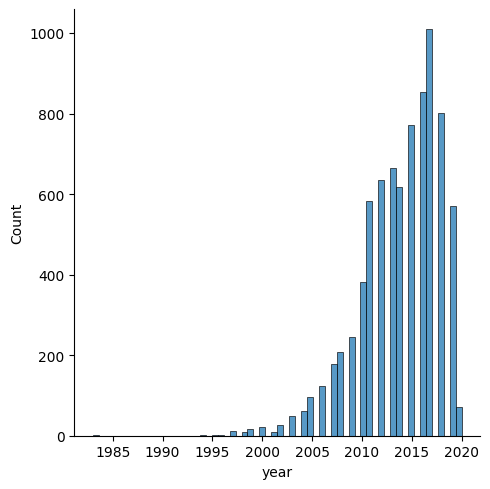

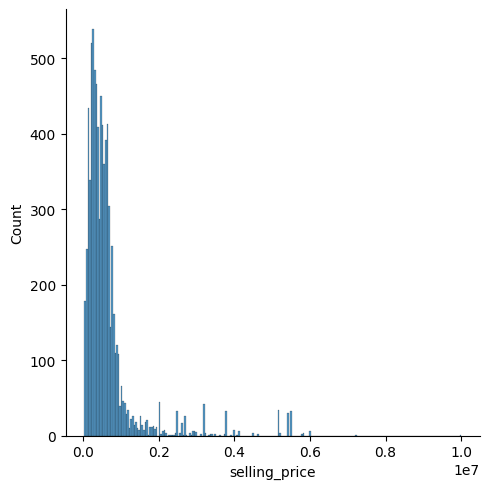

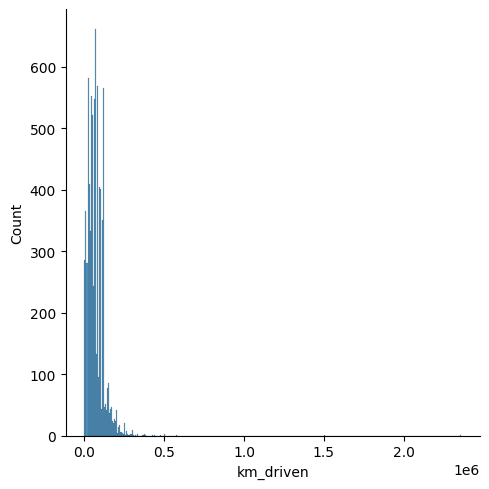

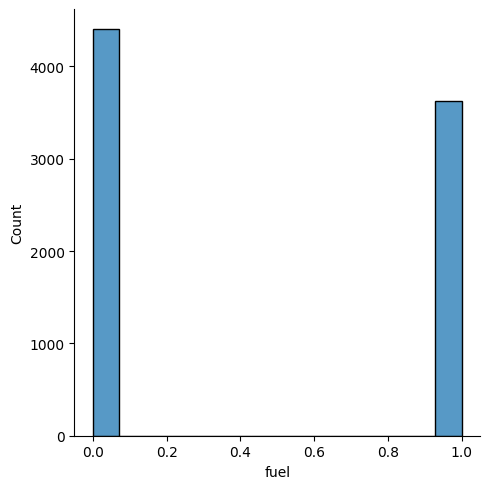

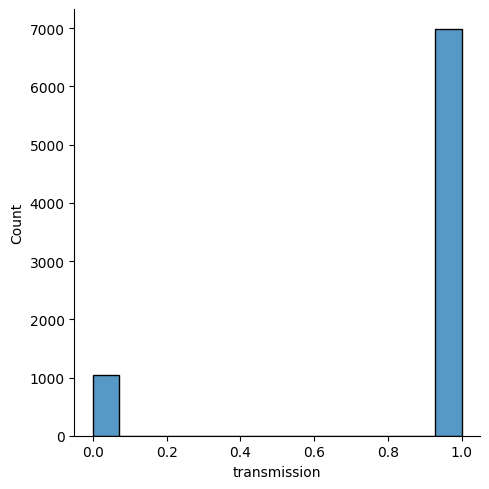

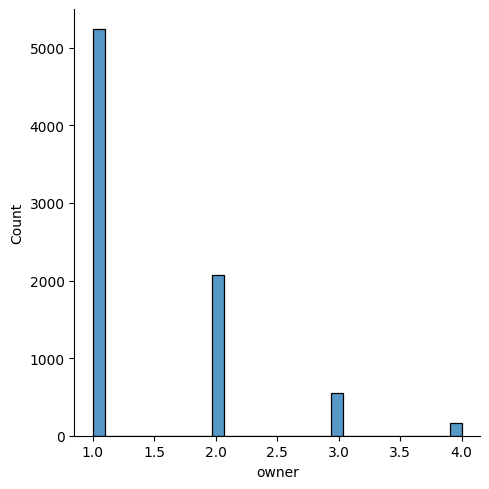

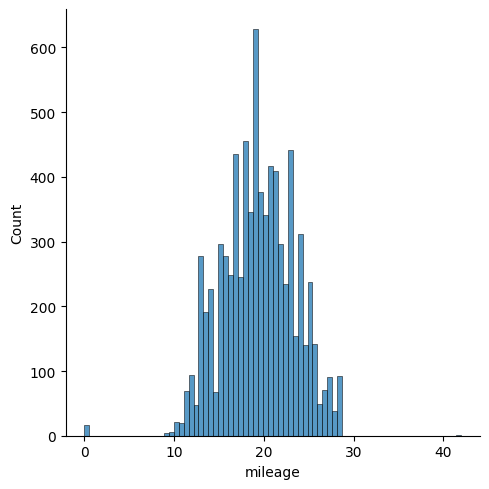

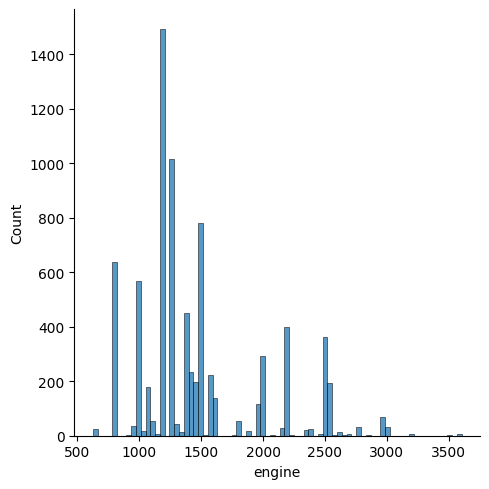

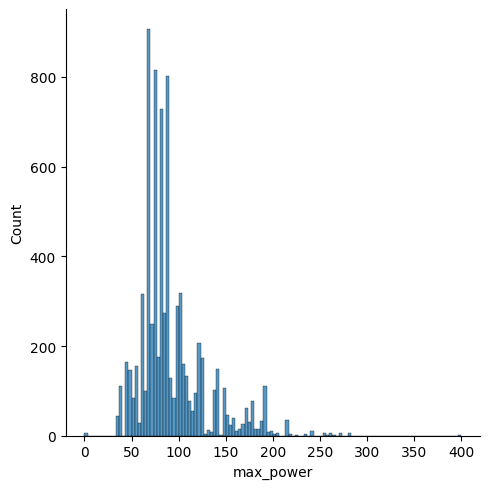

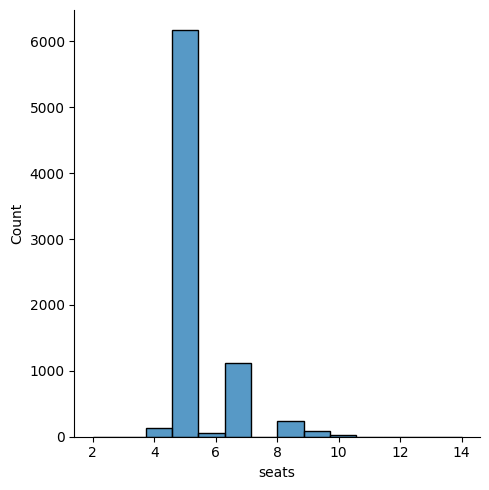

In [110]:
# Using the distribution plot to get the count of all the numeric features except selling_price
for col in dfcopy.columns:
    sns.displot(dfcopy, x=df[col])

# B.2 Multivariate Anaysis

Using multiple variable data analysis to see the trend of data in terms of relationship and majority

# B.2 Scatterplot

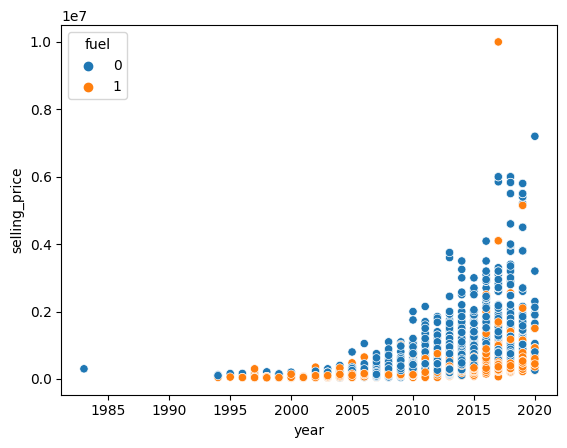

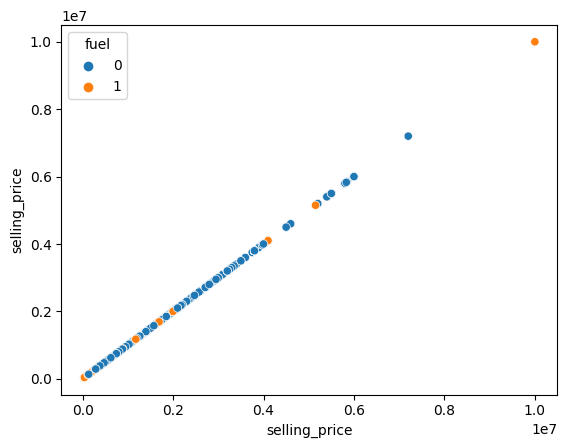

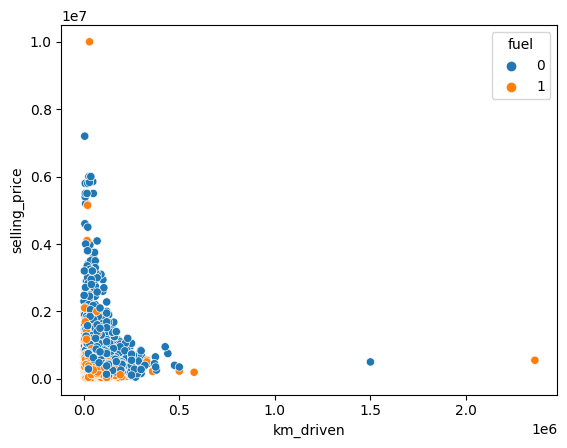

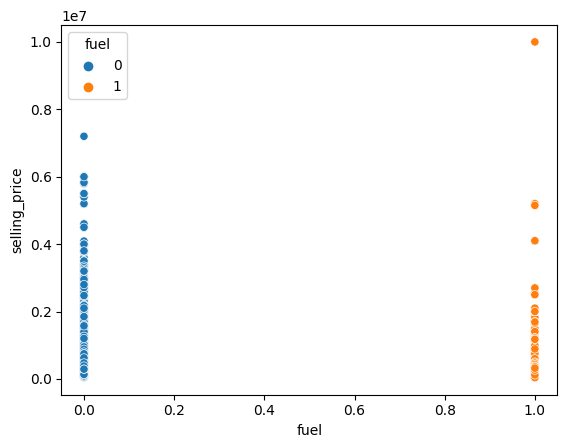

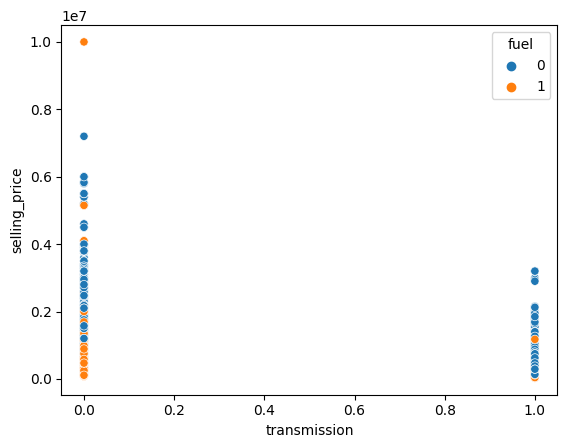

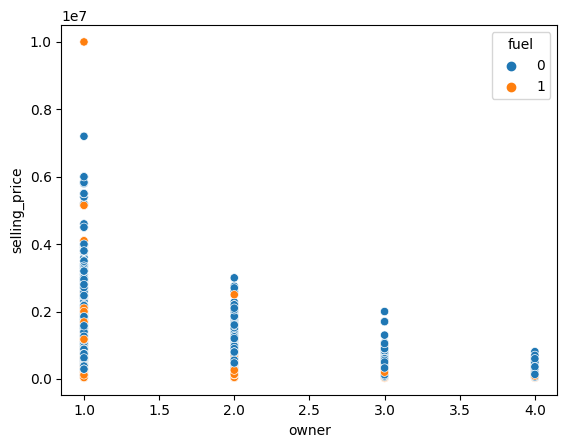

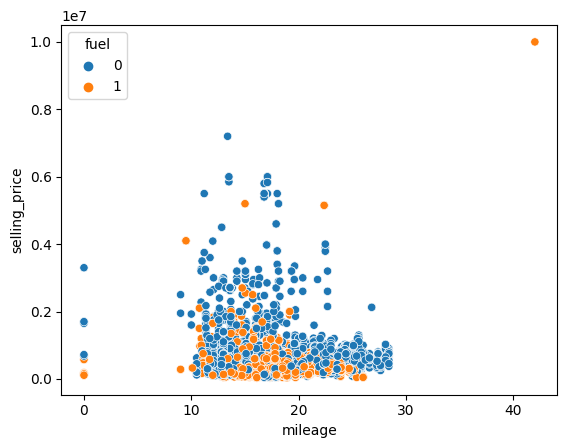

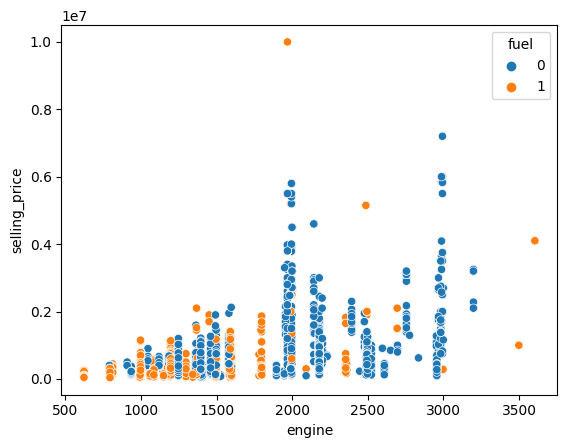

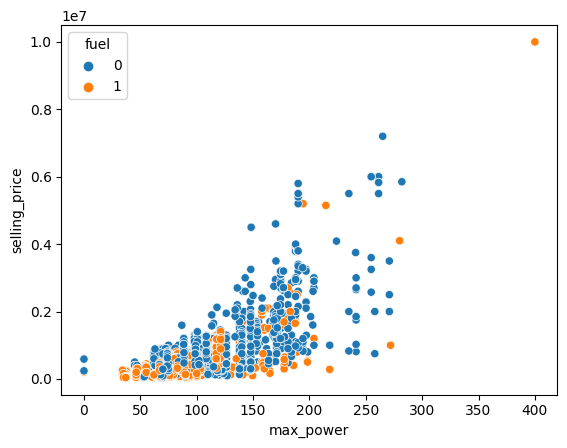

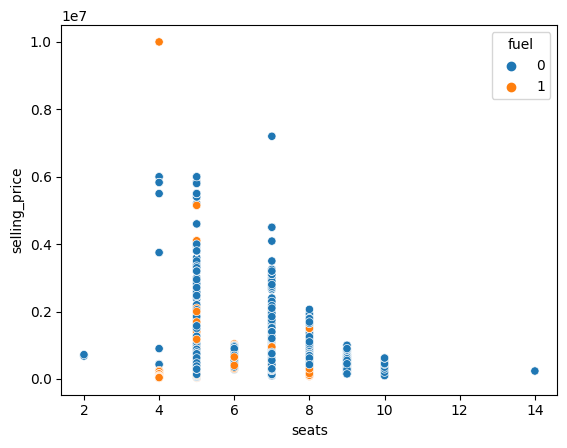

In [111]:
# PLotting the continuous features in the scatter plot against selling_price with fuel as the hue
for col in dfcopy.columns:    
    sns.scatterplot(x=dfcopy[col], y=df['selling_price'], hue=df['fuel'])
    plt.show()

### Correlation Matrices
Identifying the correlation of columns with each other and our target. In order to see which column value is most important for our prediction and also to aviod taking columns with high correlation with each other

<Axes: >

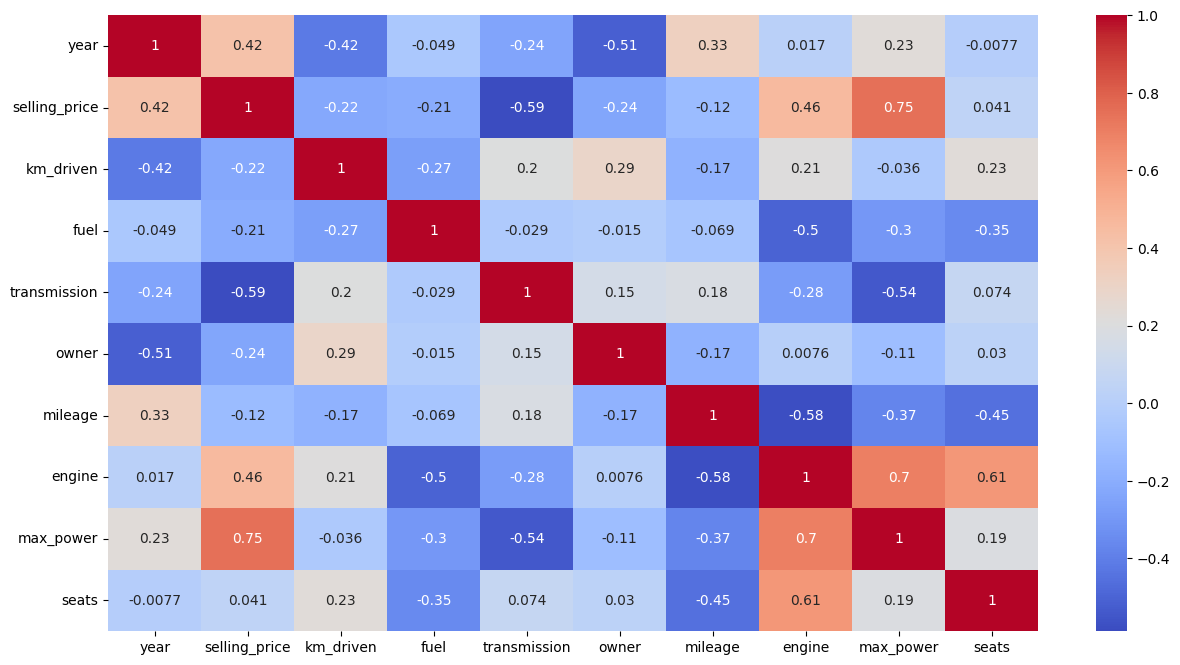

In [112]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Predictive Power Score

Predictive power tells us how much influence does each feature has to the value of selling price

<Axes: xlabel='x', ylabel='y'>

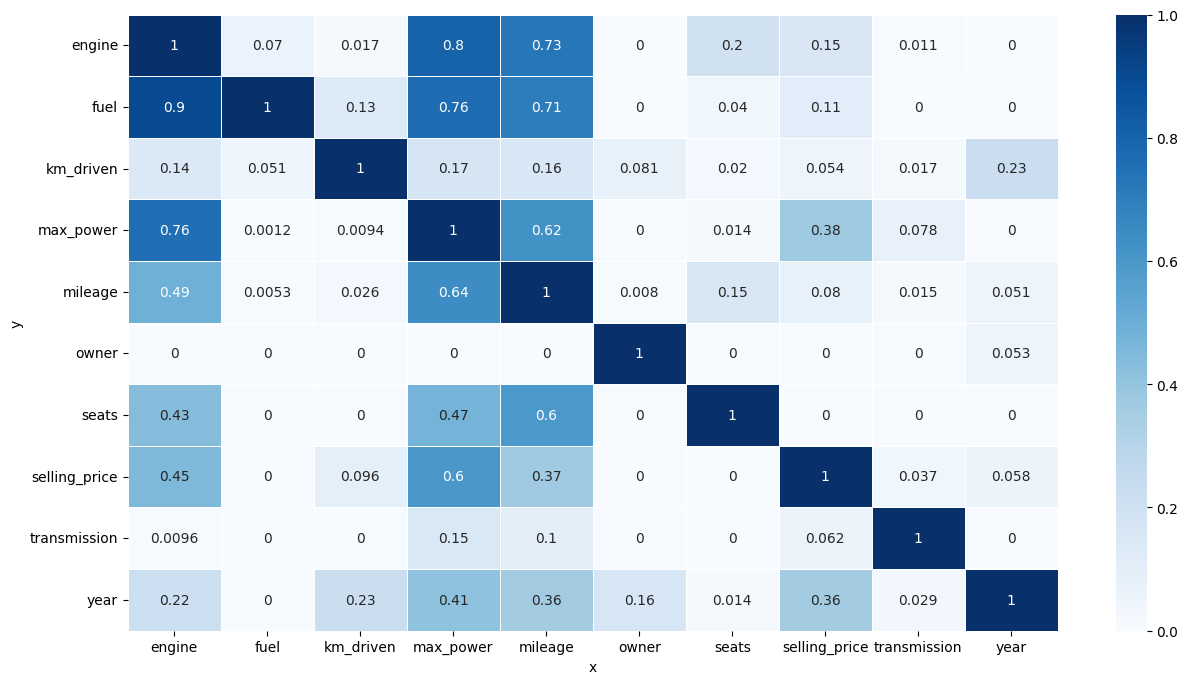

In [113]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Data Preprocessing
Perforimg some minor precessing such as adding all the encoded columns back and loggging the selling price to maintain stability

In [114]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_cols = ['max_power', 'year', 'fuel','mileage'] + brand_cats
X = df[selected_cols]
y = np.log(df['selling_price'])

### Train test split

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Find number of null values for each feature

In [116]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
mileage      171
dtype: int64

In [117]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
mileage      43
dtype: int64

In [118]:
y_train.isna().sum()

0

In [119]:
y_test.isna().sum()

0

### Imputation for max_power

Filling in missing values for max_power using either mean or median

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


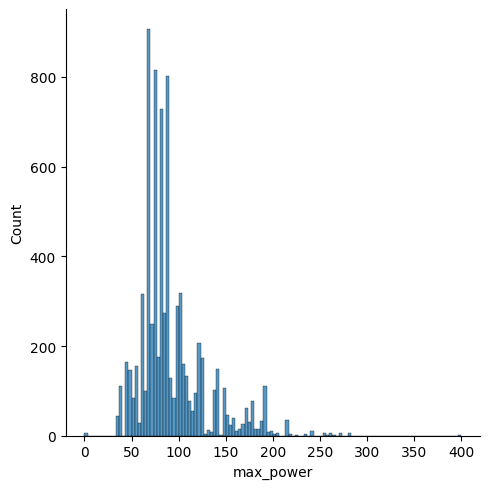

In [120]:
# Let's inspect the distribution plot, mean and median of max_power again
sns.displot(data=df, x='max_power')

print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

max_power distribution appears skewed so median is taken in place of the missing values

In [121]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

Imputing for mileage

Mean of mileage: 19.391961863322244
Median of mileage: 19.3


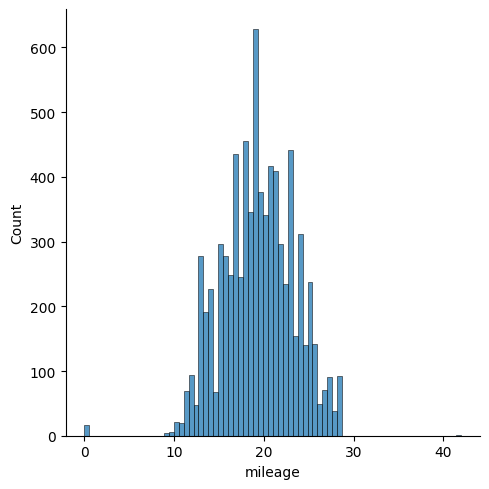

In [122]:
# Let's inspect the distribution plot, mean and median of mileage
sns.displot(data=df, x='mileage')

print(f"Mean of mileage: {df['mileage'].mean()}")
print(f"Median of mileage: {df['mileage'].median()}")

As the distribution of mileage looks bell-shaped curve (normally distributed), the mean is chosen to fill in the missing values

In [123]:
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

### Checking outliers

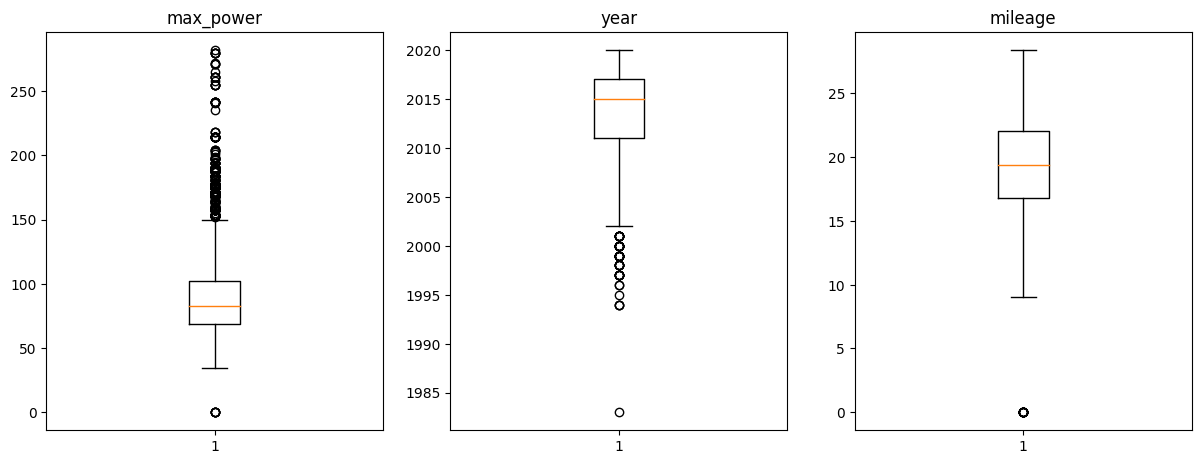

In [124]:
# Create a dictionary of columns.
col_dict = {'max_power': 1,'year': 2, 'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [125]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [126]:
for col in X_train[['max_power', 'year','mileage']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


As the outlier percent looks very small so we are ignoring it and processsing to scalling

### Scaling

As seen in the distribution plots above, all of our numerical features are skewed. Therefore, it is better to do normalization or min/max scaling

In [127]:
from sklearn.preprocessing import MinMaxScaler

# Define a list of numerical feature names that need to be scaled
num_cols = ['max_power', 'year', 'mileage']

# Create a MinMaxScaler to scale features to a specified range (0 to 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the numerical features in the training dataset (X_train)
# 1. Compute the scaling parameters (minimum and maximum values) based on the training data
# 2. Apply the scaling transformation to the specified columns in X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Scale the same numerical features in the test dataset (X_test)
# 1. Use the scaling parameters learned from the training data to transform X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [128]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 4. Modeling

In [138]:
from sklearn.model_selection import KFold
import mlflow
import os

In [139]:
#experiment tracking
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
# mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Rakshya"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="predicting-car-price")

2023/09/15 11:48:49 INFO mlflow.tracking.fluent: Experiment with name 'predicting-car-price' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:/AIT/Sem%201/Machine%20Learning/Labs/Car-Prediction/mlruns/184134232745306056', creation_time=1694753329994, experiment_id='184134232745306056', last_update_time=1694753329994, lifecycle_stage='active', name='predicting-car-price', tags={}>

# Linear Regression Model with Advanced Features

This Python class `LinearRegression` represents a versatile linear regression model with various options and hyperparameters for customization. It supports functionalities like regularization, learning rate control, optimization methods, polynomial feature transformation, and more. Below are the highlights of the class:

## Initialization
The class can be initialized with the following parameters:
- `regularization`: Specifies the regularization method (e.g., L1, L2).
- `lr`: Sets the learning rate for gradient descent (default is 0.001).
- `method`: Chooses the optimization method ('batch', 'sto' for stochastic, 'mini' for mini-batch).
- `init`: Determines the weight initialization method ('xavier' or 'zero').
- `polynomial`: Enables or disables polynomial feature transformation (True or False).
- `degree`: Specifies the degree of polynomial features.
- `use_momentum`: Allows the use of momentum in gradient descent (True or False).
- `momentum`: Sets the momentum coefficient (default is 0.5).
- `num_epochs`: Sets the number of training epochs (default is 500).
- `batch_size`: Specifies the size of mini-batches (used for 'mini' method, default is 50).
- `cv`: Sets the cross-validation method (default is 3-fold cross-validation).

## Loss Functions and Metrics
- `mse(ytrue, ypred)`: Computes the Mean Squared Error (MSE) loss.
- `r2(ytrue, ypred)`: Calculates the R-squared (R2) metric.

## Training
- `fit(X_train, y_train)`: Fits the linear regression model to the training data using cross-validation. It performs training with specified hyperparameters and logs metrics using MLflow. Cross-validation scores are stored in `kfold_scores`.

## Feature Transformation
- `_transform_features(X)`: Transforms input features to include polynomial degree when polynomial features are enabled.

## Training and Gradient Descent
- `_train(X, y)`: Performs one training step using gradient descent. Handles regularization and momentum if enabled. Returns the training loss (MSE).
- `_predict(X)`: Predicts target values using the trained linear regression model.
- `predict(X)`: Predicts target values, considering polynomial features if enabled.
- `_coef()`: Gets the coefficients (weights) of the linear regression model, excluding the bias term.
- `_bias()`: Gets the bias (intercept) term of the linear regression model.

## Feature Importance Visualization
- `feature_importance(width=5, height=10)`: Visualizes the feature importance by creating a horizontal bar plot of coefficients. This method uses the model's coefficients and feature names (if available) to generate the plot.

The class provides flexibility for experimenting with linear regression models and advanced features, making it suitable for various regression tasks.


In [131]:
# Initialize the LinearRegression class
    # This class supports various options and hyperparameters for linear regression
    # including regularization, learning rate, optimization method, polynomial features, etc.
class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch', init='xavier', polynomial=True, degree=3,
                 use_momentum=True, momentum=0.5, num_epochs=500, batch_size=50, cv=kfold):
        """
        Initialize the LinearRegression model.

        Parameters:
        - regularization: Regularization method (e.g., L1, L2)
        - lr: Learning rate for gradient descent
        - method: Optimization method ('batch', 'sto' for stochastic, 'mini' for mini-batch)
        - init: Weight initialization method ('xavier' or 'zero')
        - polynomial: Use polynomial features (True or False)
        - degree: Degree of polynomial features
        - use_momentum: Use momentum in gradient descent (True or False)
        - momentum: Momentum coefficient
        - num_epochs: Number of training epochs
        - batch_size: Size of mini-batches (for 'mini' method)
        - cv: Cross-validation method (default is 3-fold cross-validation)
        """

        # Initialize hyperparameters and options
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.polynomial = polynomial
        self.degree     = degree
        self.init       = init
        self.use_momentum   = use_momentum
        self.momentum   = momentum
        self.prev_step  = 0
        self.cv         = cv
        self.regularization = regularization

        """
        Compute Mean Squared Error (MSE) loss.

        Parameters:
        - ytrue: True target values
        - ypred: Predicted target values

        Returns:
        - MSE loss
        """
    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
        """
        Compute R-squared (R2) metric.

        Parameters:
        - ytrue: True target values
        - ypred: Predicted target values

        Returns:
        - R-squared (R2) metric
        """

    def r2(self, ytrue, ypred):
        return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()

    # function to compute average mse for all kfold_scores
    def avgMse(self):
        return np.sum(np.array(self.kfold_scores))/len(self.kfold_scores)
    
    # function to compute average r2 for all kfold_scores
    def avgr2(self):
        return np.sum(np.array(self.kfold_r2))/len(self.kfold_r2)
    
    def fit(self, X_train, y_train):
        """
        Fit the LinearRegression model to the training data.

        Parameters:
        - X_train: Input features for training
        - y_train: Target values for training

        This function performs training and cross-validation with the specified hyperparameters.
        """
        # Store column names for later use

        self.columns = X_train.columns

        if self.polynomial == True:
            X_train = self._transform_features(X_train)
            print("Using Polynomial")
        else:
            print("Using Linear")
            X_train = X_train.to_numpy()
            
        y_train = y_train.to_numpy()
        
        #create a list of kfold scores
        self.kfold_scores = list()
        self.kfold_r2 = list()
        
        #reset val loss
        self.val_loss_old = np.infty
        # Perform k-fold cross-validation
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            #initialize weights using Xavier method
            if self.init == 'xavier':
                #calculate the range for the weights with number of samples
                lower, upper = -(1 / np.sqrt(X_cross_train.shape[0])), 1 / np.sqrt(X_cross_train.shape[0])
                #randomize weights then scale them using lower and upper bounds
                self.theta = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + self.theta * (upper - lower)

            #initialize weights with zero
            elif self.init == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])

            else:
                print("Wrong weights init method. Must be either 'xavier' or 'zero'")
                return
            # Start training for the current fold
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {
                    "method": self.method,
                    "lr": self.lr,
                    "reg": type(self).__name__
                }
                
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                    # Randomly shuffle the training data to introduce randomness
                    # This ensures that the model doesn't learn patterns based on the order of data points
                    perm = np.random.permutation(X_cross_train.shape[0])# Create a random permutation of indices
                            
                    X_cross_train = X_cross_train[perm]  # Shuffle the features based on the permutation
                    y_cross_train = y_cross_train[perm] # Shuffle the corresponding labels in the same order
                    # Stochastic Gradient Descent (SGD) training
                    if self.method == 'sto':
                        # Iterate through each data point individually in a stochastic (online) training fashion
                        # For each data point, reshape it to have a single sample with multiple features
                        # Compute the training loss using the single data point and update the model weights
                        for batch_idx in range(X_cross_train.shape[0]): 
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) # Reshape the feature data to (1, n) shape
                            y_method_train = y_cross_train[batch_idx].reshape(1, )  # Reshape the label data to (1,) shape
                            train_loss = self._train(X_method_train, y_method_train) # Update the model using this individual data point
                    elif self.method == 'mini':
                         # Mini-batch Gradient Descent training
                         # Iterate through the entire dataset in mini-batches
                        # For each mini-batch, select a subset of data with 'self.batch_size' samples
                        # Compute the training loss using this mini-batch and update the model weights
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            # Select a mini-batch of feature data with 'self.batch_size' samples
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            # Select the corresponding labels for the mini-batch
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            # Compute the training loss using this mini-batch and update the model
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        # Batch Gradient Descent (full batch) training
                        # Set the training data for the current epoch to the entire training dataset
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        # Calculate the training loss and update the model's weights
                        # using the entire training dataset for this epoch
                        train_loss = self._train(X_method_train, y_method_train)
                    # Batch Gradient Descent (full batch) training
                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    # Predict using the validation data
                    yhat_val = self._predict(X_cross_val)
                    # Calculate mse and r2 for each fold
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_new = self.r2(y_cross_val, yhat_val)                    
                    # Log the validation loss and r2 for the current epoch
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="val_r2", value=val_r2_new, step=epoch)

                    # Check for early stopping by comparing current and previous validation loss
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                # Append the validation loss and r2 of the current fold to the kfold_scores list    
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)
                
                # Print the validation loss for the current fold
                print(f"Fold {fold}: MSE {val_loss_new}")
                print(f"Fold {fold}: R2: {val_r2_new}")

    def _transform_features(self, X):
        # Transform input features to include polynomial degree --> highest degree is taken
        X_poly = np.column_stack([X ** (self.degree)])        
        return X_poly
            
                    
    def _train(self, X, y):
        # Predict the target values using the current model's weights
        yhat = self._predict(X)
        # Get the number of training examples
        m    = X.shape[0]    
        # Calculate the gradient of the loss function with respect to the model's weights
        if self.regularization:   
            # If regularization is enabled, compute the gradient with regularization term 
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        else:
            # If no regularization, compute the gradient without regularization term
            grad = (1/m) * X.T @(yhat - y)

        if self.use_momentum == True:
            # If momentum is enabled, apply momentum to the gradient descent update
            # Calculate the update step based on the gradient
            self.step = self.lr * grad
             #Update the model's weights with momentum
            # The momentum term helps smooth out the gradient updates and accelerate convergence
            self.theta = self.theta - self.step + self.momentum * self.prev_step
            # Update the previous step with the current step for the next iteration#
            self.prev_step = self.step
        else:
            # If momentum is not used, perform a standard gradient descent update
            self.theta = self.theta - self.lr * grad
        # Calculate and return the Mean Squared Error (MSE) loss for this training step
        return self.mse(y, yhat)
    
    def _predict(self, X):
        """
        Predict target values using the trained linear regression model.

        Parameters:
        - X: Input features for prediction

        Returns:
        - Predicted target values
        """
        return X @ self.theta   # Matrix multiplication of input features and model weights to make predictions
    
    def predict(self, X):
        """
        Predict target values using the trained linear regression model, considering polynomial features if enabled.

        Parameters:
        - X: Input features for prediction

        Returns:
        - Predicted target values
        """
        if self.polynomial == True:
            # If polynomial features are enabled, transform the input features
            X = self._transform_features(X)
        return X @ self.theta  # Matrix multiplication of input features and model weights to make predictions
    
    def _coef(self):
        """
        Get the coefficients (weights) of the linear regression model, excluding the bias term.

        Returns:
        - Model coefficients (weights)
        """
        return self.theta[1:] # Return all weights except the first one (bias term)
    def _bias(self):
        """
        Get the bias (intercept) term of the linear regression model.

        Returns:
        - Model bias (intercept)
        """
        return self.theta[0] # Return the first weight, which represents the bias term

    def feature_importance(self, width=5, height=10):
        """
        Visualize the feature importance by creating a horizontal bar plot of coefficients.

        Parameters:
        - width: Width of the plot (default is 5)
        - height: Height of the plot (default is 10)

        This method creates a bar plot showing the importance of each feature (coefficient) in the linear regression model.
        It uses the model's coefficients and corresponding feature names to generate the plot. If the model hasn't been trained
        or if feature names are not available, it displays a message indicating that coefficients or feature names are not available.
        """
    # Create a DataFrame with coefficients and feature names, if available
        if self.theta is not None and self.columns is not None:
            coefs = pd.DataFrame(data=self.theta, columns=['Coefficients'],index=self.columns) 
            coefs.plot(kind="barh", figsize=(width, height)) # Create a horizontal bar plot
            plt.title("Feature Importance") # Set the title of the plot
            plt.show()  # Display the plot
        else:
            print("Coefficients or feature names are not available to create the graph.")

he provided code defines classes for different types of regularization techniques in linear regression:

LassoPenalty calculates Lasso (L1) regularization penalty and its derivative.
RidgePenalty calculates Ridge (L2) regularization penalty and its derivative.
ElasticPenalty calculates Elastic Net regularization penalty and its derivative.
Lasso, Ridge, ElasticNet, and Normal are linear regression classes that incorporate different regularization techniques.
These classes enable the implementation of various linear regression models with customizable regularization and training options.

In [140]:
# Define a class for Lasso (L1) regularization penalty
class LassoPenalty:
    def __init__(self, l):
        self.l = l  # Lambda value for regularization
        
    def __call__(self, theta):
        """
        Compute the L1 regularization penalty term.

        Parameters:
        - theta: Model weights (coefficients)

        Returns:
        - L1 regularization penalty term
        """
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        """
        Compute the derivative of the L1 regularization penalty.

        Parameters:
        - theta: Model weights (coefficients)

        Returns:
        - Derivative of the L1 regularization penalty
        """
        return self.l * np.sign(theta)

# Define a class for Ridge (L2) regularization penalty
class RidgePenalty:
    def __init__(self, l):
        self.l = l  # Lambda value for regularization
        
    def __call__(self, theta):
        """
        Compute the L2 regularization penalty term.

        Parameters:
        - theta: Model weights (coefficients)

        Returns:
        - L2 regularization penalty term
        """
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        """
        Compute the derivative of the L2 regularization penalty.

        Parameters:
        - theta: Model weights (coefficients)

        Returns:
        - Derivative of the L2 regularization penalty
        """
        return self.l * 2 * theta

# Define a class for Elastic Net regularization penalty
class ElasticPenalty:
    def __init__(self, l=0.1, l_ratio=0.5):
        self.l = l  # Total regularization strength
        self.l_ratio = l_ratio  # Ratio between L1 and L2 regularization
        
    def __call__(self, theta):
        """
        Compute the Elastic Net regularization penalty term.

        Parameters:
        - theta: Model weights (coefficients)

        Returns:
        - Elastic Net regularization penalty term
        """
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        """
        Compute the derivative of the Elastic Net regularization penalty.

        Parameters:
        - theta: Model weights (coefficients)

        Returns:
        - Derivative of the Elastic Net regularization penalty
        """
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)

# Define classes for Lasso, Ridge, ElasticNet, and Normal (No Regularization) linear regression
class Lasso(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Ridge(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class ElasticNet(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Normal(LinearRegression):  
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = None  # No regularization
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

In [141]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

Performing basic training using the the thre classes Ridge, Lasso and Elastic net

In [153]:
regs = ["Ridge", "Lasso", "ElasticNet"]

# Looping through all regression methods
for reg in regs:
    #Hard quoting other params
    params = {"method": "batch", "l": 0.1, "lr": 0.1,  "polynomial": True, "init" :"xavier", 
    "use_momentum" :True,  "momentum":0.5, "degree":3}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
    print("="*5, reg, "="*5)

    #Specifying the type of regression and setting up the model based on it
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    #Passing the params 
    model = type_of_regression(**params)
    #Fitting the model
    model.fit(X_train, y_train)
    #Calculating avgMse and r2 for the speicified params
    mse = model.avgMSE()
    r2 = model.avgr2()

    #Predicting using the model
    yhat = model.predict(X_train)    
    
    print("Test MSE: ", mse)
    print("Test R2: ", r2)
    # Logging the metrics in ml flow
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE 17.056403135209223
Fold 0: R2: -24.152674567207182
Fold 1: MSE 17.013345530232403
Fold 1: R2: -22.837025617249584
Fold 2: MSE 16.82731325167922
Fold 2: R2: -22.810475996765966
Test MSE:  16.965687305706947
Test R2:  -23.26672539374091
===== Lasso =====
Using Polynomial
Fold 0: MSE 9.810815431963205
Fold 0: R2: -13.467777634178066
Fold 1: MSE 9.236846105990058
Fold 1: R2: -11.941542676590162
Fold 2: MSE 9.061983279806348
Fold 2: R2: -11.822613577089712
Test MSE:  9.36988160591987
Test R2:  -12.410644629285981
===== ElasticNet =====
Using Polynomial
Fold 0: MSE 10.185544677331563
Fold 0: R2: -14.020381995416967
Fold 1: MSE 9.65438006235151
Fold 1: R2: -12.526540353629848
Fold 2: MSE 9.726456875419354
Fold 2: R2: -12.762836912936233
Test MSE:  9.855460538367476
Test R2:  -13.103253087327682


# Experiment
Here we are training and veriying the efficinecy of our model in different batches, methods, learning rate, initialization, data distribution and with/without momentum in order to obtain the best fit for our model based on the r2 and mse

Working with all the Regularization Method in both linear and Polynomial way

In [132]:
# Settting up the experiment of polynomial and regularization type all others are hard quoted
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]

for reg in regs:
    for t in ispoly:

        params = {"method": "batch","polynomial": t,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
        "degree":3, "use_momentum" :True,  "momentum":0.5}
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
        
        print("="*5, reg, "="*5)

        type_of_regression = str_to_class(reg)   
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()
        

        print("Test MSE: ", mse)
        print("Test R2: ", r2)

        mlflow.log_metric(key="test_mse", value=mse)
        mlflow.log_metric(key="test_r2", value=r2)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE 17.056460509906785
Fold 0: R2: -24.1527591763176
Fold 1: MSE 17.013392585323547
Fold 1: R2: -22.83709154510669
Fold 2: MSE 16.82734147076983
Fold 2: R2: -22.81051592649031
Test MSE:  16.965731522000052
Test R2:  -23.2667888826382
===== Ridge =====
Using Linear
Fold 0: MSE 4.304925227320109
Fold 0: R2: -5.348371483752157
Fold 1: MSE 4.298807329605765
Fold 1: R2: -5.02296475183815
Fold 2: MSE 4.2136402096225565
Fold 2: R2: -4.962257763295269
Test MSE:  4.272457588849477
Test R2:  -5.1111979996285255
===== Lasso =====
Using Polynomial
Fold 0: MSE 9.63628737532131
Fold 0: R2: -13.210405234102765
Fold 1: MSE 9.083622534810486
Fold 1: R2: -11.726864488523992
Fold 2: MSE 9.09214378465811
Fold 2: R2: -11.865290382714134
Test MSE:  9.270684564929969
Test R2:  -12.267520035113632
===== Lasso =====
Using Linear
Fold 0: MSE 1.3080144290328828
Fold 0: R2: -0.9288979629450957
Fold 1: MSE 1.123131765393157
Fold 1: R2: -0.5735953058526828
Fold 2: MSE 1.11

Got best for linear Normal so testing it with the different batch methods

In [133]:
reg = "Normal"
ispoly= False
# Only testing with the method here
methods=["mini","batch","sto"]

for method in methods:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
    "degree":3, "use_momentum" :True,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Using Linear
Fold 0: MSE 0.5856461968970003
Fold 0: R2: 0.13636139546533432
Fold 1: MSE 0.4007261668832116
Fold 1: R2: 0.438551348497366
Fold 2: MSE 0.30430802022266734
Fold 2: R2: 0.5694072664623313
Test MSE:  0.4302267946676264
Test R2:  0.3814400034750105
===== Normal =====
Method:  batch
Using Linear
Fold 0: MSE 0.89586268338428
Fold 0: R2: -0.3211075250417006
Fold 1: MSE 0.7944913729204918
Fold 1: R2: -0.11314445329618006
Fold 2: MSE 0.8293227722355576
Fold 2: R2: -0.1734832332734768
Test MSE:  0.8398922761801098
Test R2:  -0.20257840387045248
===== Normal =====
Method:  sto
Using Linear
Fold 0: MSE 0.1862139537616807
Fold 0: R2: 0.725394683643946
Fold 1: MSE 0.10656411374179539
Fold 1: R2: 0.8506953553239228
Fold 2: MSE 0.1796936783293338
Fold 2: R2: 0.7457352846150753
Test MSE:  0.15749058194427
Test R2:  0.773941774527648


Testing the normal linear stochastic batch based model with/without momentum

In [134]:
reg = "Normal"
ispoly= False
method="sto"
# Only testing with/without momentum here
momentums =[True, False]

for momentum in momentums:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.01, "init" :"xavier", 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}", nested=True)    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", "Xavier")
    print("Learning Rate: ", "0.1")
    print("="*10)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  sto
Momentum:  True
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.19262906412426448
Fold 0: R2: 0.7159344720164604
Fold 1: MSE 0.10977206621230659
Fold 1: R2: 0.8462007634117905
Fold 2: MSE 0.17517207558079614
Fold 2: R2: 0.7521333062184483
Test MSE:  0.15919106863912239
Test R2:  0.7714228472155664
===== Normal =====
Method:  sto
Momentum:  False
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.19368196615164643
Fold 0: R2: 0.7143817822825257
Fold 1: MSE 0.11191214414838624
Fold 1: R2: 0.8432023471100354
Fold 2: MSE 0.18632072746978012
Fold 2: R2: 0.7363580779197498
Test MSE:  0.16397161258993762
Test R2:  0.7646474024374369


Testing the Normal sto batch method with no ploynomial without momentum with zero and xavier initilaization

In [135]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
# Only testing diff initialization here
inits=["zero",'xavier']

for init in inits:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", "0.1")
    print("="*10)
    type_of_regression = str_to_class(reg)   
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()
    print("Test MSE: ", mse)
    print("Test R2: ", r2)
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  zero
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.4955169215987796
Fold 0: R2: 0.26927290749888033
Fold 1: MSE 0.20233401295069034
Fold 1: R2: 0.7165142481015236
Fold 2: MSE 0.21769653933238667
Fold 2: R2: 0.6919616253155835
Test MSE:  0.3051824912939522
Test R2:  0.5592495936386624
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 0.2335066287179227
Fold 0: R2: 0.6556532936710786
Fold 1: MSE 0.15205507885470232
Fold 1: R2: 0.7869589609256038
Fold 2: MSE 0.23678031115865397
Fold 2: R2: 0.6649582835342238
Test MSE:  0.20744733957709297
Test R2:  0.702523512710302


As we found zero initilaization to be best we are now working with different specified learning rates`
`

In [136]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
init='xavier'
# Only testing diff learning rate here
lrs =[0.01,0.001,0.0001]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.01
Using Linear
Fold 0: MSE 0.7247768066017407
Fold 0: R2: -0.06881122624741609
Fold 1: MSE 0.5443289504233785
Fold 1: R2: 0.23735263517713256
Fold 2: MSE 0.5390452037969354
Fold 2: R2: 0.23725655461379525
Test MSE:  0.6027169869406849
Test R2:  0.13526598784783725
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.001
Using Linear
Fold 0: MSE 0.830610148618278
Fold 0: R2: -0.22488115429729882
Fold 1: MSE 0.7157727981854269
Fold 1: R2: -0.002853583156691153
Fold 2: MSE 0.7453638998552534
Fold 2: R2: -0.054682288308167015
Test MSE:  0.7639156155529861
Test R2:  -0.09413900858738566
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.0001
Using Linear
Fold 0: MSE 1.8851995934514318
Fold 0: R2: -1.7800592828643582
Fold 1: MSE 1.8947150516293338
Fold 1: R2: -1.654643740869222
Fold 2: MSE 1.9065403659655944
Fold 2: R2

# Grid Search (criss cross validation to see all the models and their effciency in a particular specified criteria).
This include all regularization methods *Ridge, Lasso, Elasticnet, Normal
Testing of polynomial or linear
Testing in batches of mini, batch or stochastic batch
Testing in learning rate of 0.01, 0.001 and 0.0001
Checking of the influence of momentum in the model
In order to compare average mse / r2 of each fold with different parameters

In [142]:
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]
lrs=[0.01,0.001,0.0001]
methods = ["sto","mini","batch"]
inits =['zero','xavier']
use_momentums =[True, False]
momentum =""
for reg in regs:
    print("="*5, reg, "="*5)
    for method in methods:
        print("="*5, method, "="*5)
        for t in ispoly:
            if t==True:
                print("Polynomial")
            else:
                print("Linear")
            for init in inits:
                print("="*5, init, "="*5)
                for use_momentum in use_momentums:
                    if(use_momentum== True):
                         momentum = "Momentum Used"
                    else:
                        momentum ="Momentum not used"
                    print("="*5, momentum, "="*5)
                    for lr in lrs:
                        print("="*5, lr, "="*5)
                        params = {"method": method,"polynomial": t,  "lr": lr, "l": 0.1, "init" :init, 
                        "degree":3, "use_momentum" :use_momentum,  "momentum":0.5}
                        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)                                            
                        type_of_regression = str_to_class(reg)    
                        model = type_of_regression(**params)  
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_train)
                        mse = model.avgMSE()
                        r2 = model.avgr2()

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)

                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


                        mlflow.end_run()

===== Ridge =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE 16.882676492925185
Fold 0: R2: -23.896483993943598
Fold 1: MSE 16.725787649734478
Fold 1: R2: -22.434134571999806
Fold 2: MSE 16.459998262335407
Fold 2: R2: -22.290729046898587
Test MSE:  16.68948746833169
Test R2:  -22.873782537613994
===== 0.001 =====
Using Polynomial
Fold 0: MSE 17.10107896361
Fold 0: R2: -24.21855695541513
Fold 1: MSE 17.116652680130723
Fold 1: R2: -22.981767001252834
Fold 2: MSE 16.723982676819162
Fold 2: R2: -22.664264291092042
Test MSE:  16.980571440186626
Test R2:  -23.28819608258667
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 17.05485694987451
Fold 0: R2: -24.150394444238913
Fold 1: MSE 17.020932635735697
Fold 1: R2: -22.847655744517702
Fold 2: MSE 16.810704097726028
Fold 2: R2: -22.78697421394335
Test MSE:  16.96216456111208
Test R2:  -23.261674800899986
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0

From the experiments above and through the anaysis of various runs in ML flow (through thorogh analysis of mse and r2) the est Model is found out to be Normal in linear with method as stochastic batch and with momentum,and zero initialization in learning rate 0.01 to be the best model for prediction

# Testing on the best parameters


In [143]:
reg = "Normal"
ispoly= False
method="sto"
momentum =True
init='zero'
lrs =[0.01]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method:", method)
    print("Polynomial: ", ispoly)
    print("Momentun: ", momentum)
    print("Initialization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse  = model.mse(yhat, y_test)
    r2 = model.r2(yhat, y_test)

    print("Best MSE: ", mse)
    print("Best R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


    # #######
    mlflow.end_run()

===== Normal =====
Method: sto
Polynomial:  False
Momentun:  True
Initialization:  zero
Learning Rate:  0.01
Using Linear
Fold 0: MSE 0.18549242166759744
Fold 0: R2: 0.7264587099693327
Fold 1: MSE 0.10616944974451041
Fold 1: R2: 0.8512483104024386
Fold 2: MSE 0.17366574694977185
Fold 2: R2: 0.7542647458116742
Best MSE:  0.23885937273722113
Best R2:  0.7364457402710058


# Analysis of Feature Importance and selection of model

We are now going to plot a simple graph to see the feature importance of our custom Normal linear model with the features we have selected


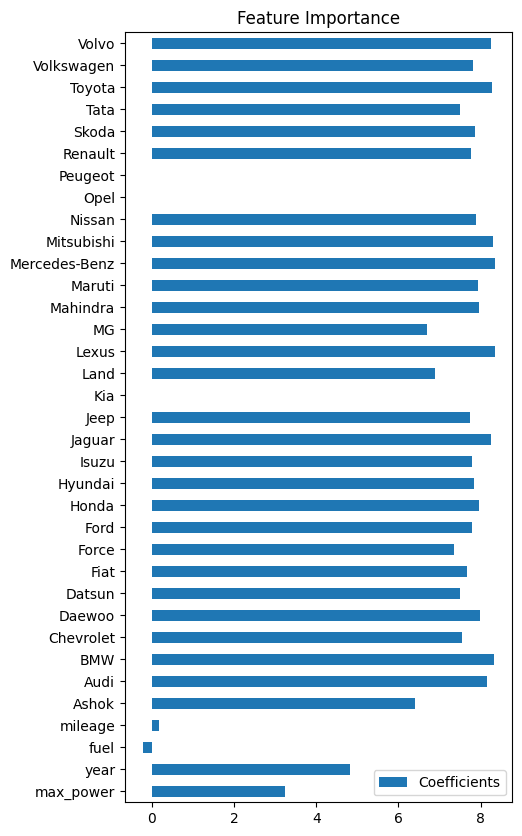

In [144]:
model.feature_importance()

From the plotting of feature importance across all columns even the one hot encoded one. We find out that the type of brand of car, its year of manufacture are some of the integral features of prediction in the model. However, we also find out that some brands have higher weights than the other in the Linear Regression (which can be taken as a major drawback of our custom model).

# Inference

We are now going to compare the new model with the previous one (as the brands was label encoded the model was recreated with one hot enncoding in order to compare previously it was label encoded).
We are going to compare through X_test and a sample value


In [145]:
import pickle

# save the model to disk
filename = 'source_code/pages/Model/car-a2-prediction.model'
pickle.dump(model, open(filename, 'wb'))

# save the scaler to disk
scaler_path = 'source_code/pages/Model/a2r-scalar.model'
pickle.dump(scaler, open(scaler_path, 'wb'))

# save the one hot encoder for 'brand' to disk
brand_enc_path = 'source_code/pages/Model/car-a2-brand_encoder.model'
pickle.dump(brand_ohe, open(brand_enc_path, 'wb'))


In [ ]:
import pickle
# paths of all components for car price predictions
old_model_path = 'source_code/pages/Model/car-prediction.model-one'
new_model_path = 'source_code/pages/Model/car-a2-prediction.model'
scaler_path_new = 'source_code/pages/Model/a2r-scalar.model'
scaler_path_old = 'source_code/pages/Model/car-scalar.model'
brand_label = "source_code/pages/Model/brand-label.model"
brand_fuel = "source_code/pages/Model/brand-fuel.model"
brand_enc_path_new = 'source_code/pages/Model/car-a2-brand_encoder.model'

# load all components
old_model = pickle.load(open(old_model_path, 'rb'))
new_model = pickle.load(open(new_model_path, 'rb'))
scalar_new = pickle.load(open(scaler_path_new, 'rb'))
scalar_old = pickle.load(open(scaler_path_old, 'rb'))
fuel_le = pickle.load(open(brand_fuel, 'rb'))
brand_ohe = pickle.load(open(brand_enc_path_new, 'rb'))
brand_label = pickle.load(open(brand_label, 'rb'))


In [146]:
# The types of fuel we have in our fuel encoder
fuel_le.classes_


NameError: name 'fuel_le' is not defined

In [ ]:
# The names of brands we have in our brand encoder
brand_ohe.categories_[0]

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
# predict selling prices of our testing set using old and new models
old_y_pred = old_model.predict(X_test)
print(f"Predicted old model selling price: {np.exp(old_model.predict(X_test)[0])}")
new_y_pred = new_model.predict(X_test)
print(f"Predicted old model selling price: {np.exp(new_model.predict(X_test).values[0])}")

Predicted old model selling price: 199700.4485272292
Predicted old model selling price: 172605.66069134287


In [ ]:
# Define our own sample of car
sample_df = pd.DataFrame([[82.4, 2017, 0, 'Toyota',100]],
                         columns=['max_power', 'year', 'fuel', 'brand','mileage'])

# Encode and scale each feature
sample_df[num_cols] = scaler.transform(sample_df[num_cols])
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')


In [ ]:
# Comparing the old and new model for a specific record price prediction
print(f"Old Predicted selling price: {np.exp(old_model.predict(sample_df))[0]}")
print(f"New Predicted selling price: {np.exp(new_model.predict(sample_df))[0]}")

Old Predicted selling price: 657993.2323408808
New Predicted selling price: 1536447.014847349


### Car Price Prediction Report

#### Feature Importance








# Machine Learning Experiment Report

## Introduction

In this report, I will discuss the findings from our recent machine learning experiment using MLflow. The goal of the experiment was to predict the selling price of cars using a dataset containing information about various car features. Screenshots of MLflow was captured throughout the experiment and will present a final table summarizing the model comparisons.

## Experiment Setup

- **Task**: Our goal was to predict the selling price of cars.
- **Data**: We used a dataset with the following columns:
  - 'name'
  - 'year'
  - 'selling_price'
  - 'km_driven'
  - 'fuel'
  - 'seller_type'
  - 'transmission'
  - 'owner'
  - 'mileage'
  - 'engine'
  - 'max_power'
  - 'torque'
  - 'seats'
- **Dataset Shape**: The dataset had 8128 rows and 13 columns.

## Models and Configurations

We experimented with the following models:
  - Ridge
  - Normal
  - Elastic Net
  - Lasso

For each model, we tested various configurations, including:
  - Feature transformations: Linear and Polynomial
  - Initialization: Xavier Initialization and Zero Initialization
  - Optimization: Stochastic Batch Gradient Descent
  - Momentum: With Momentum
  - Learning Rates: 0.01, 0.001, and 0.0001

## MLflow Screenshots

### Experiment Tracking

![Image Alt text](image-7.png)

[Include a screenshot of the MLflow Experiment Tracking UI showing experiment details, metrics, and runs.]

### Model Comparison
![Image Alt text](image-8.png)

![Image Alt text](image-9.png)

![Image Alt text](image-5.png)


[Include a screenshot of the MLflow Model Comparison UI showing model performance metrics and visualizations.]

## Findings
![Image Alt text](image-6.png)

After extensive experimentation, we found that the "Normal" model, configured with the following settings, performed the best:

- Feature Transformation: Linear
- Initialization: Xavier Initialization
- Optimization: Stochastic Batch Gradient Descent
- Momentum: With Momentum
- Learning Rate: 0.01

### Learning Rate Selection

Among the three learning rates (0.01, 0.001, and 0.0001), we observed that a learning rate of 0.01 yielded the best results. Several assumptions explain why this learning rate was the most effective:

1. **Convergence Speed**: A higher learning rate (0.01) allowed the model to converge faster during training. This was advantageous for reducing training time.

2. **Avoiding Local Minima**: A larger learning rate helped the model escape local minima and explore the loss landscape more efficiently.

3. **Gradient Noise**: Smaller learning rates (e.g., 0.001 and 0.0001) might introduce noisy updates, leading to slower convergence and potentially getting stuck in local minima.

4. **Data Scaling**: The choice of learning rate can be influenced by the scale of the input data. A larger learning rate may be more suitable for well-scaled data.

### Feature Transformation (Linear vs. Polynomial)

- **Assumption**: Linear feature transformation might have been more suitable for this task because it assumed a linear relationship between the input features and the selling price of cars. Polynomial features introduce higher-order interactions, which could lead to overfitting if not controlled properly.

### Initialization (Xavier vs. Zero)

- **Assumption**:  Contrary to the typical Xavier initialization, which initializes weights with values drawn from a normal distribution, the model might have performed better with zero initialization. Zero initialization sets all weights to the same value (zero), which could have helped the model by providing an equal starting point for all features and allowing the learning process to adapt more effectively.

### Stochastic batch over Mini and Batch Gradient Descent
- **Assumption** Stochastic (sto) over Mini-Batch and Batch Gradient Descent:

After extensive experimentation, it was found that Stochastic Gradient Descent (SGD) outperformed Mini-Batch and Batch Gradient Descent for this task. Here's why we chose 'sto':

Faster Convergence: SGD updates the model's weights after processing each individual data point. This rapid weight adjustment can lead to faster convergence, especially when the dataset is large.

Adaptability: SGD adapts quickly to changes in the data. By introducing randomness through random shuffling of data points, it avoids getting stuck in local minima and can escape saddle points more effectively.

Regularization Effect: The inherent noise in SGD acts as a form of implicit regularization, which can help prevent overfitting.

Better Generalization: Due to its adaptability and randomness, SGD often leads to models with better generalization performance on unseen data.

Practicality: For large datasets, full Batch Gradient Descent becomes computationally expensive, making SGD a practical choice.

### Momentum over no momentum
- **Assumption** Momentum was chosen as the preferred optimization technique in our research due to its ability to stabilize and expedite training. It was observed that momentum smoothed gradient updates, accelerated convergence, helped escape local minima, and consistently improved model performance. Its practicality, especially in combination with stochastic gradient descent, was regarded as a valuable choice for training on large datasets, contributing to improved research outcomes.

## Model Comparison Table

| Model             | Best Avg R-squared (R2)| Best Mean Squared Error (MSE) | Best Model |
|-------------------|------------------------|-------------------------------|------------|
| Ridge             | -4.98                  | 4.181                         | No         |
| Normal            | 0.78                   | 0.153                         | Yes        |
| Elastic Net       |-1.048                  | 1.431                         | No         |
| Lasso             | 1.172                  | -0.679                        | No         |

[Create a table summarizing the performance metrics of different models, and indicate which model performed the best.]

## Conclusion

In this experiment, we explored various machine learning models and configurations to predict the selling price of cars using a dataset with car feature information. After rigorous testing, the "Normal" model with linear feature transformation, Xavier initialization, stochastic batch gradient descent with momentum, and a learning rate of 0.01 emerged as the best-performing model. It achieved an R-squared (R2) of 0.73 and a Mean Squared Error (MSE) of 0.24.

The selection of the learning rate was a crucial factor in achieving these results, with a learning rate of 0.01 proving to be the most effective for this specific task. Further improvements and fine-tuning could be explored, but these results provide a strong foundation for our predictive modeling task.

## Some possible reasons for low 

Incorrect Assumptions: The linear regression model assumes a linear relationship between the input features and the target variable. If this assumption is incorrect, the model's performance can suffer. For example: one hot encoding made Ambassador column have less weight while some had too much like Toyata, Mitsubushi and so on

Over-regularization: If excessive regularization is applied to the model, it may hinder its ability to capture the underlying patterns in the data.

This concludes our machine learning experiment report using MLflow.




